In [1]:
# We start by importing the relevant packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
import sympy as sm
import math

We consider the following consumer problem with 2 goods:

\\[ u(x_1,x_2) = x_1 x_2 + 2 x_2 \\]

The consumption-possibilty frontier is \\[(x_1,x_2) \in (0,\infty)\times(0,\infty)\\] Also, we assume that \\[p_1,p_2,I>0\\]

Then we define our utility function

We then visualize the utility function to consider its properties

In [3]:
x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
I  = sm.symbols('I')

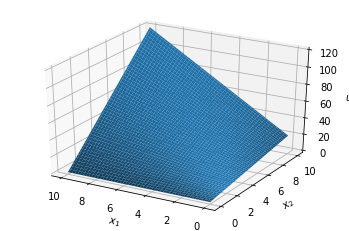

In [4]:
x1_vec = np.linspace(0,10,100)
x2_vec = np.linspace(0,10,100)
x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec)
u_grid=u(x1_grid,x2_grid)

# We plot the graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_grid,x2_grid,u_grid)

# Then we add labels and invert the axes
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')

ax.invert_xaxis()


We consider the utility maximisation problem: \\[ max x_1 x_2 + 2 x_2 u.b. p_1 x_1 + p_2 x_2 = I\\]  

We define our utility and budget constraint in terms of sympy

In [5]:
utility = x1*x2 + 2*x2
budget_constraint = sm.Eq(p1*x1 + p2*x2, I)

We begin by isolating x_2

In [6]:
x2constraint = sm.solve(budget_constraint, x2)

\\[x_2 = (I - p_1*x_1)/p_2\\]

We substitute our result for x_2 into the the utility function

In [7]:
utility_subx2 = utility.subs(x2, x2constraint[0])

\\[u = x_1*(I - p_1*x_1)/p_2 + 2*(I - p_1*x_1)/p_2\\]

Now we are able to maximise the shit out of this equation by finding the deriviate with respect to x_1

In [8]:
focx1 = sm.diff(utility_subx2, x1)

We set this equal to zero and solve for x_1

In [9]:
x1sol = sm.solve(sm.Eq(focx1, 0), x1)

\\[x_1 = (I - 2 p_1)/2 p_1\\]

We substitute the above result for x_1 into our budget constraint expressed as a function for x_2

Manual solution for x_2

In [13]:
x1constraint = sm.solve(budget_constraint, x1)
utility_subx1 = utility.subs(x1, x1constraint[0])
focx1 = sm.diff(utility_subx1, x2)
x2sol = sm.solve(sm.Eq(focx2, 0), x2)

NameError: name 'focx2' is not defined

We choose to disregard corner solutions \\[x_2 = (I + 2p_1)/2p_2\\]

b) We let prices p_1 = 4 and p_2 = 1 and I = 16. Due to a change in circumstances for the production of the two goods, a fall in the price of good 1 falls to p_1 = 1

In [14]:
def x2b(p1,p2,I):
    return (I/2 + p1)/p2

def x1b(p1, p2, I):
    return (I/2 - p1)/p1

In [15]:
print(x2b(4,1,16))
print(x1b(4,1,16))

12.0
1.0


In [16]:
print(x2b(1,1,16))
print(x1b(1,1,16))

9.0
7.0


Vi har nu hestet os frem til ovenstående og derfor løst både a) og b) = ild. Vi skal have have lavet lidt lækkert grafarbejde i c) hvr man kan se hhv. substitutions- og indkomsteffekt ved hjælp af Hicks-kompensation. Ku være fedt med lidt sliders.

Now we plot the budget constraint and indifference curve:

In [22]:
utility = 200

def objective(x1,x2,utility):
    return u(x1,x2)-utility

# = 0 then on indifference curve with u=utility

def find_indifference_curve(y1,y2,N,x2_max):
    
    # a. utiltty in (y1,y2)
    u_y1y2 = u(y1,y2)
    
    # b. allocate numpy arrays
    x1_vec = np.empty(N)
    x2_vec = np.linspace(1e-8,x2_max,N)
    
    # c. loop through x2
    for i,x2 in enumerate(x2_vec):

        x1_guess = 0 # initial guess
        sol = optimize.root(objective, x1_guess, args=(x2,u_y1y2)) 
        # optimize.root -> solve objective = 0 starting from x1 = x1_guess
        
        x1_vec[i] = sol.x[0]
    
    return x1_vec,x2_vec


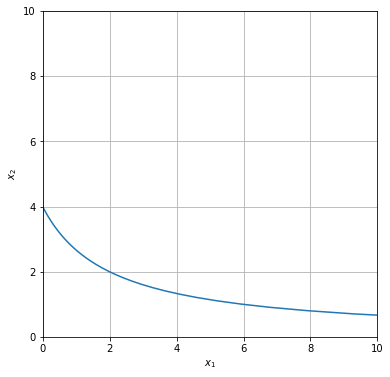

In [23]:
# a. find indifference curve through (2,2) for x2 in [0,10]
x2_max = 10
x1_vec,x2_vec = find_indifference_curve(y1=2,y2=2,N=100,x2_max=x2_max) 

# b. plot inddifference curve
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

ax.plot(x1_vec,x2_vec)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim([0,x2_max])
ax.set_ylim([0,x2_max])
ax.grid(True)

In [35]:
# We start by defining the utility function

def u(x1,x2):
    u = (x1)*x2 + 2 * x2
    return u

def bestsolution(I,p1,p2,N1,N2,do_print=True):
    
    # First we allocate some numpy arrays
    empty_tuple = (N1,N2)
    x1_values = np.empty(empty_tuple)
    x2_values = np.empty(empty_tuple)
    u_values = np.empty(empty_tuple)
    
    # Next, we find a random guess for a solution
    x1_guess = 0
    x2_guess = 0
    u_guess = u(0,0)
    
    # Then we loop through all possible solutions
    for i in range(N1):
        for j in range(N2):
            
            # defining x1 and x2
            x1_values[i,j] = x1 = (I-2*p1)/2*p2
            x2_values[i,j] = x2 = (I+2*p1)/2*p2
            
            # utility
            if p1*x1+p2*x2<=I:
                u_values[i,j] = u(x1,x2)
            else:
                u_values[i,j] = u(0,0)
                
            if u_values[i,j] > u_guess:
                x1_guess = x1_values[i,j]
                x2_guess = x2_values[i,j]
                u_guess = u_values[i,j]
                
    if do_print:
        print_solution(x1_guess,x2_guess,u_guess,I,p1,p2)
        
    return x1_guess, x2_guess, u_guess, x1_values, x2_values, u_values

def print_solution(x1,x2,u,I,p1,p2):
    print(f'x1 = {x1:.8f}')
    print(f'x2 = {x2:.8f}')
    print(f'u = {u:.8f}')
    print(f'I-p1*x1-p2*x2 = {I-p1*x1-p2*x2:8f}')

In [36]:
# Solution for I=16 and p1=1 and p2=1
sol = bestsolution(I=16,p1=1,p2=1,N1=500,N2=500)

x1 = 7.00000000
x2 = 9.00000000
u = 81.00000000
I-p1*x1-p2*x2 = 0.000000


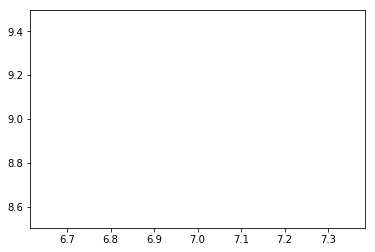

In [49]:
# we unpack the solution to be able to plot it

x1_guess,x2_guess,u_guess,x1_values, x2_values, u_values = sol

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x1_values, x2_values)